In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
### Explore medians for both years

In [2]:
# steps done:
# Uppercase
# remove duplicates
# remove outliers
# name comparison

In [3]:
aorig = pd.read_csv('UK Gender Pay Gap Data - 2017 to 2018.csv', header=0)
borig = pd.read_csv('UK Gender Pay Gap Data - 2018 to 2019.csv', header=0)

print(aorig.shape)
print(borig.shape)

(10560, 25)
(10776, 25)


In [4]:
aorig.head(3)

,EmployerName,Address,CompanyNumber,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,...,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile,CompanyLinkToGPGInfo,ResponsiblePerson,EmployerSize,CurrentName,SubmittedAfterTheDeadline,DueDate,DateSubmitted
0,"""Bryanston School"",Incorporated","Bryanston House,\r\nBlandford,\r\nDorset,\r\nU...",00226143,85310,18.0,28.2,0.0,0.0,0.0,0.0,...,50.8,51.5,48.5,https://www.bryanston.co.uk/employment,Nick McRobb (Bursar and Clerk to the Governors),500 to 999,"""Bryanston School"",Incorporated",False,05/04/2018 00:00:00,27/03/2018 11:42:49
1,"""RED BAND"" CHEMICAL COMPANY, LIMITED","19 Smith's Place,\r\nLeith Walk,\r\nEdinburgh,...",SC016876,47730,2.3,-2.7,15.0,37.5,15.6,66.7,...,89.7,18.1,81.9,NaN,Philip Galt (Managing Director),250 to 499,"""RED BAND"" CHEMICAL COMPANY, LIMITED",False,05/04/2018 00:00:00,28/03/2018 16:44:25
2,118 LIMITED,"Fusion Point,\r\nDumballs Road,\r\nCardiff,\r\...",03951948,61900,1.7,2.8,13.1,13.6,70.0,57.0,...,50.0,58.0,42.0,NaN,"Emma Crowe (VP, Human Resources)",500 to 999,118 LIMITED,False,05/04/2018 00:00:00,27/03/2018 19:10:41


In [5]:
borig.head(3)

,EmployerName,Address,CompanyNumber,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,...,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile,CompanyLinkToGPGInfo,ResponsiblePerson,EmployerSize,CurrentName,SubmittedAfterTheDeadline,DueDate,DateSubmitted
0,"""Bryanston School"",Incorporated","Bryanston House,\r\nBlandford,\r\nDorset,\r\nU...",00226143,85310,19.6,32.5,NaN,NaN,0.0,0.0,...,55.1,53.3,46.7,https://www.bryanston.co.uk/employment,Michael McGovern (Chief Operating Officer),500 to 999,"""Bryanston School"",Incorporated",False,05/04/2019 00:00:00,03/04/2019 13:43:34
1,"""RED BAND"" CHEMICAL COMPANY, LIMITED","19 Smith's Place,\r\nLeith Walk,\r\nEdinburgh,...",SC016876,47730,7.7,-4.2,23.7,-75.2,22.2,82.0,...,88.4,20.3,79.7,NaN,Philip Galt (Managing Director),250 to 499,"""RED BAND"" CHEMICAL COMPANY, LIMITED",False,05/04/2019 00:00:00,01/04/2019 12:37:21
2,118 LIMITED,"Fusion Point,\r\nDumballs Road,\r\nCardiff,\r\...",03951948,61900,7.7,12.7,11.3,10.9,67.0,52.0,...,50.0,56.0,44.0,NaN,Michael Graham (CEO),1000 to 4999,118 LIMITED,False,05/04/2019 00:00:00,06/03/2019 13:26:24


## Uppercase

In [6]:
aorig['EmployerName'] = aorig['EmployerName'].str.upper()
borig['EmployerName'] = borig['EmployerName'].str.upper()

## Remove quotation marks

In [7]:
aorig['EmployerName'] = aorig['EmployerName'].str.replace('"', '')
borig['EmployerName'] = borig['EmployerName'].str.replace('"', '')

## Remove trailing space

In [8]:
aorig['EmployerName'] = aorig['EmployerName'].str.strip()
borig['EmployerName'] = borig['EmployerName'].str.strip()

## Remove new line from Address

In [9]:
aorig['Address'] = aorig['Address'].str.replace(r'\r\n', ' ')
borig['Address'] = borig['Address'].str.replace(r'\r\n', ' ')

# Remove 2017 duplicates

In [10]:
aorig['EmployerName'].value_counts()[:5]

TALBOT UNDERWRITING SERVICES LTD      2
ABBEY LOGISTICS GROUP LIMITED         1
IPECO HOLDINGS LIMITED                1
FORT PITT THOMAS AVELING ACADEMIES    1
UNIQUE EMPLOYMENT SERVICES LIMITED    1
Name: EmployerName, dtype: int64

In [11]:
aorig[aorig['EmployerName'] == 'TALBOT UNDERWRITING SERVICES LTD']

,EmployerName,Address,CompanyNumber,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,...,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile,CompanyLinkToGPGInfo,ResponsiblePerson,EmployerSize,CurrentName,SubmittedAfterTheDeadline,DueDate,DateSubmitted
8744,TALBOT UNDERWRITING SERVICES LTD,"60 Threadneedle Street, London, EC2R 8HP",03043304,NaN,35.0,28.0,78.0,47.0,96.0,91.0,...,28.0,85.0,15.0,https://www.validusholdings.com/media/137680/t...,Dominic Scarlett (Global Director of Human Res...,250 to 499,TALBOT UNDERWRITING LTD,False,05/04/2018 00:00:00,04/04/2018 10:44:48
8745,TALBOT UNDERWRITING SERVICES LTD,"60 Threadneedle Street, London, United Kingdom...",00100010,82990,35.0,28.0,78.0,47.0,96.0,91.0,...,28.0,85.0,15.0,https://www.validusholdings.com/about-us/resou...,Dominic Scarlett (Chief Corporate Services Off...,250 to 499,Talbot Underwriting Services Ltd,False,05/04/2018 00:00:00,03/04/2019 12:59:21


In [12]:
aorig.drop(8744, inplace=True)

## Remove 2018 duplicates

In [13]:
borig['EmployerName'].value_counts()[:5]

CHOICE SUPPORT                               2
GROUP EMPLOYMENT SERVICES LIMITED            2
ITC INFOTECH LIMITED                         2
TRENT MOTOR TRACTION COMPANY LIMITED(THE)    1
NORWICH CITY FOOTBALL CLUB PLC               1
Name: EmployerName, dtype: int64

In [14]:
borig[borig['EmployerName'] == 'CHOICE SUPPORT']

,EmployerName,Address,CompanyNumber,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,...,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile,CompanyLinkToGPGInfo,ResponsiblePerson,EmployerSize,CurrentName,SubmittedAfterTheDeadline,DueDate,DateSubmitted
1985,CHOICE SUPPORT,"100 Westminster Bridge Road, London, United Ki...",02189556,87200,-1.6,1.5,NaN,NaN,0.0,0.0,...,75.0,25.0,75.0,NaN,Mark Ferry (Director of Human Resources),1000 to 4999,Choice Support,False,05/04/2019 00:00:00,04/04/2019 20:27:02
1986,CHOICE SUPPORT,"One Hermitage Court, Hermitage Lane, Maidstone...",08971493,87200,9.7,3.6,NaN,NaN,0.0,0.0,...,77.0,31.0,69.0,NaN,Mark Ferry (Director of Human Resources),1000 to 4999,CHOICE SUPPORT,False,05/04/2019 00:00:00,04/04/2019 20:43:18


In [15]:
print(borig.at[1986, 'EmployerName'])
borig.at[1986, 'EmployerName'] = 'CHOICE SUPPORT LONDON'
print(borig.at[1986, 'EmployerName'])

CHOICE SUPPORT
CHOICE SUPPORT LONDON


In [16]:
borig[(borig['EmployerName'] == 'GROUP EMPLOYMENT SERVICES LIMITED') | (borig['EmployerName'] == 'ITC INFOTECH LIMITED') ]

,EmployerName,Address,CompanyNumber,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,...,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile,CompanyLinkToGPGInfo,ResponsiblePerson,EmployerSize,CurrentName,SubmittedAfterTheDeadline,DueDate,DateSubmitted
4015,GROUP EMPLOYMENT SERVICES LIMITED,"Venlaw, 349 Bath Street, Glasgow, Lanarkshire,...",SC352278,82990,-1.2,-0.9,NaN,NaN,0.0,0.0,...,11.7,89.0,11.0,https://www.securigroup.co.uk/news/gender-pay-...,Sarah Grant (HR Manager),1000 to 4999,GROUP EMPLOYMENT SERVICES LIMITED,False,05/04/2019 00:00:00,03/04/2019 09:56:07
4016,GROUP EMPLOYMENT SERVICES LIMITED,"Venlaw, 349 Bath Street, Glasgow, Lanarkshire,...",SC352278,82990,-1.2,-0.9,NaN,NaN,0.0,0.0,...,11.7,89.0,11.0,https://www.securigroup.co.uk/news/gender-pay-...,Sarah Grant (HR Manager),1000 to 4999,GROUP EMPLOYMENT SERVICES LIMITED,False,05/04/2019 00:00:00,03/04/2019 09:56:26
4813,ITC INFOTECH LIMITED,"Building 5 Caldecotte Lake Drive, Caldecotte, ...",02777705,"62012,\r\n62020,\r\n62030,\r\n62090",12.2,4.6,19.0,52.4,63.9,45.8,...,10.5,89.5,10.5,NaN,Hardeep Singh Garewal (President),250 to 499,ITC INFOTECH LIMITED,False,05/04/2019 00:00:00,04/04/2019 16:59:13
4814,ITC INFOTECH LIMITED,"Building 5 Caldecotte Lake Drive, Caldecotte, ...",02777705,"62012,\r\n62020,\r\n62030,\r\n62090",12.2,4.6,19.0,52.4,63.9,45.8,...,10.5,89.5,10.5,https://www.itcinfotech.com/docs/resources/Gen...,Hardeep Singh Garewal (President),Less than 250,ITC INFOTECH LIMITED,False,05/04/2019 00:00:00,05/04/2019 09:41:39


In [17]:
borig.drop(4813, inplace=True)
borig.drop(4015, inplace=True)

## Remove 2017 outliers

In [18]:
aorig.loc[aorig['DiffMedianHourlyPercent'].nlargest(5).index]

,EmployerName,Address,CompanyNumber,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,...,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile,CompanyLinkToGPGInfo,ResponsiblePerson,EmployerSize,CurrentName,SubmittedAfterTheDeadline,DueDate,DateSubmitted
8046,SHREWSBURY ACADEMIES TRUST,"Shrewsbury Academies Trust, Mount Pleasant Roa...",08407961,"1,\r\n85100,\r\n85200,\r\n85310",47.4,121.2,0.0,0.0,0.0,0.0,...,80.3,25.8,74.2,http://sat.coop,NaN,250 to 499,Shrewsbury Academies Trust,True,31/03/2018 00:00:00,16/04/2018 14:22:27
5970,MINT PAY SOLUTIONS LTD,"A&L, Windfall House D1, The Courtyard, Alban P...",08189359,"78200,\r\n82990",94.0,97.0,0.0,0.0,0.0,0.0,...,4.0,99.0,1.0,NaN,Mo El-Bassyouni (Managing Director),250 to 499,MINT PAY SOLUTIONS LTD,True,05/04/2018 00:00:00,02/07/2018 11:30:39
9946,VIDA HEALTHCARE LIMITED,"The Power House, 156 Hookstone Drive, Harrogat...",09106261,41100,68.3,79.8,0.0,0.0,0.0,0.0,...,50.0,33.0,67.0,NaN,JAMES RYCROFT (MANAGING DIRECTOR),250 to 499,VIDA HEALTHCARE LIMITED,True,05/04/2018 00:00:00,04/05/2018 15:13:33
1192,BOUX AVENUE LIMITED,"1 St Georges Road, Wimbledon, London, United K...",07191520,47710,75.4,75.7,-100.0,-100.0,0.0,81.0,...,100.0,9.0,91.0,http://www.bouxavenue.com,Laura Keane (Group HR Director),500 to 999,BOUX AVENUE LIMITED,False,05/04/2018 00:00:00,03/04/2018 15:45:54
5607,MALLING HEALTH (UK) LIMITED,"10th Floor 1 City Approach Albert Street, Eccl...",07034946,82990,51.6,73.0,33.3,33.3,2.7,0.4,...,94.3,32.9,67.1,NaN,Richard Power (CEO),250 to 499,MALLING HEALTH (UK) LIMITED,False,05/04/2018 00:00:00,28/02/2018 10:31:58


In [19]:
borig[borig['EmployerName'] == 'SHREWSBURY ACADEMIES TRUST']

,EmployerName,Address,CompanyNumber,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,...,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile,CompanyLinkToGPGInfo,ResponsiblePerson,EmployerSize,CurrentName,SubmittedAfterTheDeadline,DueDate,DateSubmitted


In [20]:
borig[borig['CompanyNumber'] == '08407961']

,EmployerName,Address,CompanyNumber,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,...,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile,CompanyLinkToGPGInfo,ResponsiblePerson,EmployerSize,CurrentName,SubmittedAfterTheDeadline,DueDate,DateSubmitted


In [21]:
borig[borig['EmployerName'] == 'MINT PAY SOLUTIONS LTD']

,EmployerName,Address,CompanyNumber,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,...,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile,CompanyLinkToGPGInfo,ResponsiblePerson,EmployerSize,CurrentName,SubmittedAfterTheDeadline,DueDate,DateSubmitted
6116,MINT PAY SOLUTIONS LTD,"A&L, Windfall House D1, The Courtyard, Alban P...",08189359,"42120,\r\n82990",59.0,65.0,0.0,0.0,0.0,0.0,...,4.0,99.0,1.0,https://www.mintpaysolutions.co.uk/index.php/g...,Mohamed El-Bassyouni (Managing Director),250 to 499,MINT PAY SOLUTIONS LTD,False,05/04/2019 00:00:00,14/03/2019 12:27:09


In [22]:
# dropped SHREWSBURY ACADEMIES TRUST; not in 2018 data
aorig.drop(8046, inplace=True)

In [23]:
aorig.loc[aorig['DiffMedianHourlyPercent'].nsmallest(5).index]

,EmployerName,Address,CompanyNumber,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,...,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile,CompanyLinkToGPGInfo,ResponsiblePerson,EmployerSize,CurrentName,SubmittedAfterTheDeadline,DueDate,DateSubmitted
838,BAR 2010 LIMITED,"Mitre House, North Park Road, Harrogate, North...",04172269,70229,-148.0,-196.5,0.0,0.0,0.0,0.0,...,0.0,99.5,0.5,NaN,Jason Hargreaves (Director),250 to 499,BAR 2010 LIMITED,True,05/04/2018 00:00:00,20/04/2018 13:08:53
4496,INBRELLA LIMITED,"5th Floor Hampton By Hilton, 42-50 Kimpton Roa...",08274708,69201,-150.0,-164.0,0.0,0.0,0.0,0.0,...,25.9,96.1,3.9,NaN,David Smith (Finance Director),250 to 499,INBRELLA LIMITED,True,05/04/2018 00:00:00,17/09/2018 10:21:11
7302,RANDSTAD HR SOLUTIONS LIMITED,"450 Capability Green, Luton, Bedfordshire, Uni...",02904400,78200,-21.3,-103.6,31.6,-2.0,2.9,1.2,...,68.7,31.1,68.9,https://www.randstad.co.uk/about-us/about-rand...,Graham Trevor (HR Director),1000 to 4999,RANDSTAD HR SOLUTIONS LIMITED,False,05/04/2018 00:00:00,03/04/2018 19:51:29
7017,PLUS PAYROLL SERVICES LIMITED,"5th Floor Hampton By Hilton, 42-50 Kimpton Roa...",08811568,78109,-64.4,-100.1,0.0,0.0,0.0,0.0,...,9.9,30.9,69.1,NaN,David Smith (Finance Director),500 to 999,PLUS PAYROLL SERVICES LIMITED,False,05/04/2018 00:00:00,04/04/2018 16:21:42
2340,CREST PLUS OPERATIONS LIMITED,"Suite A1, The Quadrant Mercury Court, Chester ...",04620624,74909,-66.5,-85.2,0.0,0.0,0.0,0.0,...,3.2,81.2,18.8,https://www.crestplus.com/pay-gap-report.pdf,Derek Harling (Managing Director),1000 to 4999,CREST PLUS OPERATIONS LIMITED,False,05/04/2018 00:00:00,19/03/2018 14:01:24


In [24]:
borig[(borig['EmployerName'] == 'BAR 2010 LIMITED') | (borig['CompanyNumber'] == '04172269')]

,EmployerName,Address,CompanyNumber,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,...,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile,CompanyLinkToGPGInfo,ResponsiblePerson,EmployerSize,CurrentName,SubmittedAfterTheDeadline,DueDate,DateSubmitted


In [25]:
borig[(borig['EmployerName'] == 'INBRELLA LIMITED') | (borig['CompanyNumber'] == '08274708')]

,EmployerName,Address,CompanyNumber,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,...,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile,CompanyLinkToGPGInfo,ResponsiblePerson,EmployerSize,CurrentName,SubmittedAfterTheDeadline,DueDate,DateSubmitted


In [26]:
borig[(borig['EmployerName'] == 'RANDSTAD HR SOLUTIONS LIMITED') | (borig['CompanyNumber'] == '02904400')]

,EmployerName,Address,CompanyNumber,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,...,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile,CompanyLinkToGPGInfo,ResponsiblePerson,EmployerSize,CurrentName,SubmittedAfterTheDeadline,DueDate,DateSubmitted
7459,RANDSTAD HR SOLUTIONS LIMITED,"450 Capability Green, Luton, Bedfordshire, Uni...",02904400,78200,-15.2,-87.1,-39.1,-1.9,80.0,67.0,...,100.0,85.0,15.0,https://www.randstad.co.uk/about-us/about-rand...,Graham Trevor (HR Director),1000 to 4999,RANDSTAD HR SOLUTIONS LIMITED,False,05/04/2019 00:00:00,29/03/2019 14:25:33


In [27]:
borig[(borig['EmployerName'] == 'PLUS PAYROLL SERVICES LIMITED') | (borig['CompanyNumber'] == '08811568')]

,EmployerName,Address,CompanyNumber,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,...,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile,CompanyLinkToGPGInfo,ResponsiblePerson,EmployerSize,CurrentName,SubmittedAfterTheDeadline,DueDate,DateSubmitted
7163,PLUS PAYROLL SERVICES LIMITED,"5th Floor Hampton By Hilton, 42-50 Kimpton Roa...",08811568,78109,-34.8,-45.8,NaN,NaN,0.0,0.0,...,13.3,38.7,61.3,http://pluspay.uk.com/gender-pay-gap-report/,David Smith (Director),250 to 499,PLUS PAYROLL SERVICES LIMITED,False,05/04/2019 00:00:00,04/04/2019 15:14:50


In [28]:
# dropped BAR 2010 LIMITED; not in 2018 data
aorig.drop(838, inplace=True)

In [29]:
aorig.at[4496, 'DiffMedianHourlyPercent'] = 100.0
aorig.at[7302, 'DiffMedianHourlyPercent'] = 100.0
aorig.at[7017, 'DiffMedianHourlyPercent'] = 100.0

## Remove 2018 outliers

In [30]:
borig.loc[borig['DiffMedianHourlyPercent'].nlargest(5).index]

,EmployerName,Address,CompanyNumber,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,...,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile,CompanyLinkToGPGInfo,ResponsiblePerson,EmployerSize,CurrentName,SubmittedAfterTheDeadline,DueDate,DateSubmitted
626,ASH & LACY FINISHES LIMITED,"Ash & Lacy House, Bromford Lane, West Bromwich...",10805186,32990,100.0,100.0,NaN,NaN,0.0,0.0,...,0.0,100.0,0.0,http://www.ashandlacy.com/construction/about-u...,Jonathan Evans (CEO & Chairman),250 to 499,ASH & LACY FINISHES LIMITED,False,05/04/2019 00:00:00,03/04/2019 08:56:20
8923,T. CLASS SECURITY LIMITED,"6 Skylines Village, Limeharbour, London, E14 9TS",03622392,80100,100.0,100.0,100.0,100.0,100.0,100.0,...,50.0,50.0,50.0,https://t-class.co.uk/,Demi Larner (Vetting Officer),250 to 499,T. CLASS SECURITY LIMITED,True,05/04/2019 00:00:00,08/05/2019 11:08:24
10162,VIDA HEALTHCARE LIMITED,"The Power House, 156 Hookstone Drive, Harrogat...",09106261,41100,70.4,79.3,0.0,0.0,0.0,0.0,...,67.0,50.0,50.0,NaN,James Rycroft (Managing Director),250 to 499,VIDA HEALTHCARE LIMITED,False,05/04/2019 00:00:00,18/03/2019 11:10:56
8793,SUFFOLK GP FEDERATION C.I.C.,"Riverside Clinic, 2 Landseer Road, Ipswich, IP...",06183049,86210,59.5,74.8,NaN,NaN,0.0,0.0,...,87.5,37.5,62.5,https://suffolkfed.org.uk/,Katrina Pollard (Financial Controller),250 to 499,SUFFOLK GP FEDERATION C.I.C.,False,05/04/2019 00:00:00,26/03/2019 13:36:06
6406,NEW MILLENNIA PAYROLL SERVICES LIMITED,"1121 Ashton Old Road, Manchester, M11 1AA",04254121,78200,6.6,74.3,36.6,60.0,2.0,2.2,...,10.6,92.1,7.9,NaN,Nicholas Hynes (Director),1000 to 4999,NEW MILLENNIA PAYROLL SERVICES LIMITED,False,05/04/2019 00:00:00,27/03/2019 11:45:19


In [31]:
aorig[(aorig['EmployerName'] == 'ASH & LACY FINISHES LIMITED') | (aorig['CompanyNumber'] == '10805186')]

,EmployerName,Address,CompanyNumber,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,...,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile,CompanyLinkToGPGInfo,ResponsiblePerson,EmployerSize,CurrentName,SubmittedAfterTheDeadline,DueDate,DateSubmitted


In [32]:
aorig[(aorig['EmployerName'] == 'T. CLASS SECURITY LIMITED') | (aorig['CompanyNumber'] == '03622392')]

,EmployerName,Address,CompanyNumber,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,...,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile,CompanyLinkToGPGInfo,ResponsiblePerson,EmployerSize,CurrentName,SubmittedAfterTheDeadline,DueDate,DateSubmitted


In [33]:
# dropped ASH & LACY FINISHES LIMITED; not in 2017 data
borig.drop(626, inplace=True)
# dropped T. CLASS SECURITY LIMITED; not in 2017 data
borig.drop(8923, inplace=True)

In [34]:
borig.loc[borig['DiffMedianHourlyPercent'].nsmallest(5).index]

,EmployerName,Address,CompanyNumber,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,...,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile,CompanyLinkToGPGInfo,ResponsiblePerson,EmployerSize,CurrentName,SubmittedAfterTheDeadline,DueDate,DateSubmitted
7288,PRIME LIFE LIMITED,"Caenarvon House, 121 Knighton Church Road, Lei...",02779611,86900,5.5,-92.3,-25.7,-93.0,1.0,1.6,...,84.8,19.4,80.6,https://www.prime-life.co.uk,Jay Hairsine (Company Secretary),1000 to 4999,PRIME LIFE LIMITED,False,05/04/2019 00:00:00,28/03/2019 12:36:23
7497,REALISE FUTURES CIC,"Realise Futures Cic, Lovetofts Drive, Ipswich,...",07828443,"56102,\r\n82990,\r\n85590",-39.5,-90.7,0.0,0.0,0.0,0.0,...,78.8,9.5,90.5,https://www.realisefutures.org,Ramon Garcia (Human Resources Manager),250 to 499,Realise Futures Cic,False,05/04/2019 00:00:00,15/03/2019 11:21:14
7459,RANDSTAD HR SOLUTIONS LIMITED,"450 Capability Green, Luton, Bedfordshire, Uni...",02904400,78200,-15.2,-87.1,-39.1,-1.9,80.0,67.0,...,100.0,85.0,15.0,https://www.randstad.co.uk/about-us/about-rand...,Graham Trevor (HR Director),1000 to 4999,RANDSTAD HR SOLUTIONS LIMITED,False,05/04/2019 00:00:00,29/03/2019 14:25:33
6442,NEWSQUEST MEDIA GROUP LIMITED,"Loudwater Mill, Station Road, High Wycombe, Bu...",01676637,58130,-11.0,-82.0,1.2,-42.7,11.0,25.0,...,58.0,53.0,47.0,http://www.newsquest.co.uk/wp-content/uploads/...,Tracey Olaleye (Group HR Director),"5000 to 19,999",NEWSQUEST MEDIA GROUP LIMITED,False,05/04/2019 00:00:00,02/04/2019 11:47:06
10706,YELLOW DOT HOLDINGS LIMITED,"2 Crown Court, Crown Way, Rushden, Northampton...",11159598,64209,-39.7,-80.7,-66.0,-636.4,66.7,64.7,...,98.8,2.4,97.6,https://www.brighthorizons.co.uk/statutory-inf...,John Handley (HR Director),250 to 499,YELLOW DOT HOLDINGS LIMITED,False,05/04/2019 00:00:00,15/03/2019 15:24:35


In [35]:
# no smallest hour% removed for 2018 GPG consistency

## Both years name consistency

In [36]:
a_in_b = 0

for i in list(aorig['EmployerName']):
    if i in list(borig['EmployerName']):
        a_in_b += 1
    
print(f'2017 in 2018: {a_in_b}')
print(f'2017 not in 2018: {aorig.shape[0] - a_in_b}')

2017 in 2018: 9602
2017 not in 2018: 955


In [37]:
b_in_a = 0

for i in list(borig['EmployerName']):
    if i in list(aorig['EmployerName']):
        b_in_a += 1
    
print(f'2018 in 2017: {b_in_a}')
print(f'2018 not in 2017: {borig.shape[0] - b_in_a}')

2018 in 2017: 9602
2018 not in 2017: 1170


In [38]:
repeat_list = []

for i in list(aorig['EmployerName']):
    if i in list(borig['EmployerName']):
        repeat_list.append(i)
    
print(f'List length: {len(repeat_list)}')
print(f'{repeat_list[:5]}')

List length: 9602
['BRYANSTON SCHOOL,INCORPORATED', 'RED BAND CHEMICAL COMPANY, LIMITED', '118 LIMITED', '123 EMPLOYEES LTD', '1610 LIMITED']


In [39]:
# checking aorig NaNs
diff_comp_num = []

for i in repeat_list:
    if (pd.isnull(aorig[aorig['EmployerName'] == i].CompanyNumber.item()) == False) & \
    (aorig[aorig['EmployerName'] == i].CompanyNumber.item() != \
    borig[borig['EmployerName'] == i].CompanyNumber.item()):
            diff_comp_num.append(i)
            
print(f'# of companies with different company numbers: {len(diff_comp_num)}')
print(f'{diff_comp_num[:5]}')       

# of companies with different company numbers: 1
['CONNECT HEALTH LIMITED']


In [40]:
# checking borig NaNs
diff_comp_num = []

for i in repeat_list:
    if (pd.isnull(borig[borig['EmployerName'] == i].CompanyNumber.item()) == False) & \
    (aorig[aorig['EmployerName'] == i].CompanyNumber.item() != \
    borig[borig['EmployerName'] == i].CompanyNumber.item()):
            diff_comp_num.append(i)
            
print(f'# of companies with different company numbers: {len(diff_comp_num)}')
print(f'{diff_comp_num[:5]}')   

# of companies with different company numbers: 2
['CONNECT HEALTH LIMITED', 'TAUNTON SCHOOL EDUCATIONAL CHARITY']


In [41]:
aorig[aorig['EmployerName'] == 'CONNECT HEALTH LIMITED']

,EmployerName,Address,CompanyNumber,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,...,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile,CompanyLinkToGPGInfo,ResponsiblePerson,EmployerSize,CurrentName,SubmittedAfterTheDeadline,DueDate,DateSubmitted
2168,CONNECT HEALTH LIMITED,"Q2 Benton Lane,, Newcastle Upon Tyne, England,...",09701038,99999,16.2,20.5,-8.0,0.0,2.0,4.0,...,52.0,51.0,49.0,http://www.connecthealth.co.uk,Lisa Davidson (HR Director),250 to 499,CONNECT PHYSICAL HEALTH CENTRES LIMITED,False,05/04/2018 00:00:00,03/04/2018 08:37:57


In [42]:
borig[borig['EmployerName'] == 'CONNECT HEALTH LIMITED']

,EmployerName,Address,CompanyNumber,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,...,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile,CompanyLinkToGPGInfo,ResponsiblePerson,EmployerSize,CurrentName,SubmittedAfterTheDeadline,DueDate,DateSubmitted
2240,CONNECT HEALTH LIMITED,"The Light Box Quorum Business Park, Benton Lan...",02337692,86900,18.4,9.4,48.2,0.0,9.7,7.9,...,56.0,45.0,55.0,https://www.connecthealth.co.uk/wp-content/upl...,Lisa Davidson (HR Director),500 to 999,CONNECT HEALTH LIMITED,False,05/04/2019 00:00:00,21/03/2019 10:39:12


In [43]:
print(aorig.at[2168, 'CompanyNumber'])
aorig.at[2168, 'CompanyNumber'] = '02337692'
print(aorig.at[2168, 'CompanyNumber'])

09701038
02337692


In [44]:
aorig[aorig['EmployerName'] == 'TAUNTON SCHOOL EDUCATIONAL CHARITY']

,EmployerName,Address,CompanyNumber,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,...,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile,CompanyLinkToGPGInfo,ResponsiblePerson,EmployerSize,CurrentName,SubmittedAfterTheDeadline,DueDate,DateSubmitted
8791,TAUNTON SCHOOL EDUCATIONAL CHARITY,"Clerk To The Governors, Taunton, Somerset, Uni...",NaN,85310,9.4,13.7,23.9,17.9,1.0,2.3,...,62.5,44.1,55.9,NaN,Johanne Davey (HR Director),500 to 999,Taunton School Educational Charity,False,05/04/2018 00:00:00,27/03/2018 13:55:38


In [45]:
borig[borig['EmployerName'] == 'TAUNTON SCHOOL EDUCATIONAL CHARITY']

,EmployerName,Address,CompanyNumber,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,...,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile,CompanyLinkToGPGInfo,ResponsiblePerson,EmployerSize,CurrentName,SubmittedAfterTheDeadline,DueDate,DateSubmitted
8991,TAUNTON SCHOOL EDUCATIONAL CHARITY,"Taunton School, Staplegrove Road, Taunton, Som...",04005803,"85100,\r\n85200,\r\n85310",12.4,21.9,-2.0,-1.7,2.0,3.0,...,58.4,40.6,59.4,NaN,Johanne Davey (HR Director),500 to 999,TAUNTON SCHOOL EDUCATIONAL CHARITY,False,05/04/2019 00:00:00,04/04/2019 09:12:38


In [46]:
print(aorig.at[8791, 'CompanyNumber'])
aorig.at[8791, 'CompanyNumber'] = '04005803'
print(aorig.at[8791, 'CompanyNumber'])

nan
04005803


In [47]:
# companies with same names are checked

In [48]:
diff_list = []

for i in list(aorig['EmployerName']):
    if i not in list(borig['EmployerName']):
        diff_list.append(i)
        
for i in list(borig['EmployerName']):
    if i not in list(aorig['EmployerName']):
        diff_list.append(i) 
    
print(f'List length of non-repeating companies: {len(diff_list)}')
print(f'{diff_list[:5]}')

List length of non-repeating companies: 2125
['1879 EVENTS MANAGEMENT LIMITED', '2 SISTERS RED MEAT LIMITED', 'A M SUPPORT SERVICES LIMITED', 'A NOVO UK LTD', 'A P SECURITY (APS) LTD']


In [49]:
new_comp_num = []

for i in diff_list:
    
    if i in list(aorig['EmployerName']):
        if pd.isnull(aorig[aorig['EmployerName'] == i].CompanyNumber.item()) == False:
            new_comp_num.append(aorig[aorig['EmployerName'] == i].CompanyNumber.item())
            
    if i in list(borig['EmployerName']):
        if pd.isnull(borig[borig['EmployerName'] == i].CompanyNumber.item()) == False:
            new_comp_num.append(borig[borig['EmployerName'] == i].CompanyNumber.item())
            
            
new_comp_num = list(set([x for x in new_comp_num if new_comp_num.count(x) > 1]))
    
print(f'# of companies that share company number but different names: {len(new_comp_num)}')

# of companies that share company number but different names: 265


In [50]:
# show high variation in names
for i in new_comp_num[:5]:
    print(aorig[aorig.CompanyNumber == i].EmployerName.item())
    print(borig[borig.CompanyNumber == i].EmployerName.item())

MACGREGOR INDUSTRIAL SUPPLIES LTD
MACGREGOR INDUSTRIAL SUPPLIES LIMITED
SIX TOWN HOUSING
SIX TOWN HOUSING LIMITED
SEAFOOD HOLDINGS LTD
BIDFRESH LIMITED
OBERTHUR TECHNOLOGIES UK LIMITED
IDEMIA UK LIMITED
PARK HOTELS MANAGEMENT LIMITED
PARK INN BY RADISSON HOTELS MANAGEMENT LTD


In [51]:
# show low variation in address
for i in new_comp_num[:5]:
    print(aorig[aorig.CompanyNumber == i].Address.item())
    print(borig[borig.CompanyNumber == i].Address.item())

15-17 Henderson Road, Inverness, IV1 1SN
15-17 Henderson Road, Inverness, IV1 1SN
6 Knowsley Place, Angouleme Way, Bury, Lancashire, BL9 0EL
6 Knowsley Place, Angouleme Way, Bury, Lancashire, BL9 0EL
Unit 10-14 Cedar Way Industrial Estate, Camley Street, London, United Kingdom, N1C 4PD
Unit 10-14 Cedar Way Industrial Estate, Camley Street, London, United Kingdom, N1C 4PD
Alexandra Way, Ashchurch Business Centre, Tewkesbury, Gloucestershire, United Kingdom, GL20 8GA
Alexandra Way, Ashchurch Business Centre, Tewkesbury, Gloucestershire, United Kingdom, GL20 8GA
Chicago Avenue, Manchester, Lancashire, United Kingdom, M90 3RA
Chicago Avenue, Manchester, Lancashire, United Kingdom, M90 3RA


In [52]:
print(aorig[aorig.CompanyNumber == new_comp_num[0]]['EmployerName'].item())
print(borig[borig.CompanyNumber == new_comp_num[0]]['EmployerName'].item())

MACGREGOR INDUSTRIAL SUPPLIES LTD
MACGREGOR INDUSTRIAL SUPPLIES LIMITED


In [53]:
corr_address_num = []
diff_address_num = []

for i in new_comp_num:
    
    if aorig[aorig.CompanyNumber == i].Address.item() == \
        borig[borig.CompanyNumber == i].Address.item():
            
            aorig.at[aorig[aorig.CompanyNumber == i].index.item(), 'EmployerName'] = \
                borig[borig.CompanyNumber == i].EmployerName.item()
            
            corr_address_num.append(i)
            
    else:
        
        diff_address_num.append(i)
    
print(f'# of 2017 companies converted to 2018 name: {len(corr_address_num)}')
print(f'Companies not corrected: {len(diff_address_num)}')

# of 2017 companies converted to 2018 name: 265
Companies not corrected: 0


In [54]:
print(aorig[aorig.CompanyNumber == new_comp_num[0]]['EmployerName'].item())
print(borig[borig.CompanyNumber == new_comp_num[0]]['EmployerName'].item())

MACGREGOR INDUSTRIAL SUPPLIES LIMITED
MACGREGOR INDUSTRIAL SUPPLIES LIMITED


In [55]:
same_list = []
diff_list = []

for i in list(aorig['EmployerName']):
    if i in list(borig['EmployerName']):
        same_list.append(i)

for i in list(aorig['EmployerName']):
    if i not in list(borig['EmployerName']):
        diff_list.append(i)
        
for i in list(borig['EmployerName']):
    if i not in list(aorig['EmployerName']):
        diff_list.append(i) 

print(f'New length of repeating companies: {len(same_list)}')
print(f'New length of non-repeating companies: {len(diff_list)}')
print(f'New length combined: {len(same_list) + len(diff_list)}')

New length of repeating companies: 9867
New length of non-repeating companies: 1595
New length combined: 11462


## Joining 2017 and 2018 data

In [56]:
ashort = aorig[['EmployerName', 'DiffMedianHourlyPercent']]
ashort = ashort.rename(columns={"DiffMedianHourlyPercent": "2017Diff"})

ashort.head(2)

,EmployerName,2017Diff
0,"BRYANSTON SCHOOL,INCORPORATED",28.2
1,"RED BAND CHEMICAL COMPANY, LIMITED",-2.7


In [57]:
bshort = borig[['EmployerName', 'DiffMedianHourlyPercent']]
bshort = bshort.rename(columns={"DiffMedianHourlyPercent": "2018Diff"})

bshort.head(2)

,EmployerName,2018Diff
0,"BRYANSTON SCHOOL,INCORPORATED",32.5
1,"RED BAND CHEMICAL COMPANY, LIMITED",-4.2


In [58]:
merged_gpg = pd.merge(ashort, bshort, on='EmployerName', how='outer')

print(merged_gpg.shape)
merged_gpg.head(5)

(11462, 3)


,EmployerName,2017Diff,2018Diff
0,"BRYANSTON SCHOOL,INCORPORATED",28.2,32.5
1,"RED BAND CHEMICAL COMPANY, LIMITED",-2.7,-4.2
2,118 LIMITED,2.8,12.7
3,123 EMPLOYEES LTD,36.0,29.0
4,1610 LIMITED,-34.0,-36.0


In [59]:
merged_gpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11462 entries, 0 to 11461
Data columns (total 3 columns):
EmployerName    11462 non-null object
2017Diff        10557 non-null float64
2018Diff        10772 non-null float64
dtypes: float64(2), object(1)
memory usage: 358.2+ KB


In [60]:
# merged_gpg.to_csv('gpgmergedoutput.csv')

## Add two year difference column

In [62]:
print(merged_gpg.shape)
merged_gpg.head()

(11462, 3)


,EmployerName,2017Diff,2018Diff
0,"BRYANSTON SCHOOL,INCORPORATED",28.2,32.5
1,"RED BAND CHEMICAL COMPANY, LIMITED",-2.7,-4.2
2,118 LIMITED,2.8,12.7
3,123 EMPLOYEES LTD,36.0,29.0
4,1610 LIMITED,-34.0,-36.0


In [63]:
merged_gpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11462 entries, 0 to 11461
Data columns (total 3 columns):
EmployerName    11462 non-null object
2017Diff        10557 non-null float64
2018Diff        10772 non-null float64
dtypes: float64(2), object(1)
memory usage: 358.2+ KB


In [65]:
# drop rows with NaN due to not able to compare
merged_gpg.dropna(axis=0, how='any', inplace=True)

print(merged_gpg.shape)

(9867, 3)


In [68]:
merged_gpg['Abs_Diff'] = abs(merged_gpg['2017Diff']) - abs(merged_gpg['2018Diff'])

merged_gpg.head()

,EmployerName,2017Diff,2018Diff,Abs_Diff
0,"BRYANSTON SCHOOL,INCORPORATED",28.2,32.5,-4.3
1,"RED BAND CHEMICAL COMPANY, LIMITED",-2.7,-4.2,-1.5
2,118 LIMITED,2.8,12.7,-9.9
3,123 EMPLOYEES LTD,36.0,29.0,7.0
4,1610 LIMITED,-34.0,-36.0,-2.0


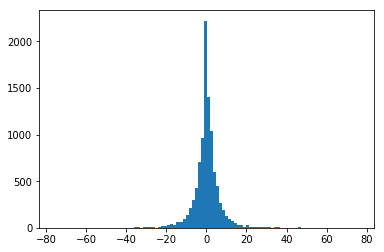

In [74]:
plt.hist(x=merged_gpg['Abs_Diff'], bins=100)
plt.show()

In [76]:
len(merged_gpg[merged_gpg['Abs_Diff'] == 0]) / len(merged_gpg)

0.07996351474612344

In [77]:
merged_gpg['Abs_Diff'].describe()

count    9867.000000
mean        0.083501
std         6.916560
min       -75.800000
25%        -2.300000
50%         0.000000
75%         2.600000
max        76.200000
Name: Abs_Diff, dtype: float64

In [78]:
merged_gpg.loc[merged_gpg['Abs_Diff'].nlargest(5).index]

,EmployerName,2017Diff,2018Diff,Abs_Diff
5100,L.E.A.D SERVICES LIMITED,-77.0,0.8,76.2
10054,WALLACE TRUST,-81.9,-5.9,76.0
9761,UNITED WHOLESALE (SCOTLAND) LIMITED,-76.0,-12.0,64.0
5704,MASCO UK WINDOW GROUP LIMITED,67.4,3.9,63.5
1191,BOUX AVENUE LIMITED,75.7,15.6,60.1


In [79]:
merged_gpg.loc[merged_gpg['Abs_Diff'].nsmallest(5).index]

,EmployerName,2017Diff,2018Diff,Abs_Diff
7337,REALISE FUTURES CIC,-14.9,-90.7,-75.8
6296,NEWSQUEST MEDIA GROUP LIMITED,7.0,-82.0,-75.0
6264,NEW MILLENNIA PAYROLL SERVICES LIMITED,11.0,74.3,-63.3
8332,SPORTING INDEX LIMITED,-10.4,-71.8,-61.4
2133,COMMUNITY INCLUSIVE TRUST,-3.1,59.0,-55.9


In [80]:
merged_gpg.sort_values(by='Abs_Diff', inplace=True)

merged_gpg.head()

,EmployerName,2017Diff,2018Diff,Abs_Diff
7337,REALISE FUTURES CIC,-14.9,-90.7,-75.8
6296,NEWSQUEST MEDIA GROUP LIMITED,7.0,-82.0,-75.0
6264,NEW MILLENNIA PAYROLL SERVICES LIMITED,11.0,74.3,-63.3
8332,SPORTING INDEX LIMITED,-10.4,-71.8,-61.4
2133,COMMUNITY INCLUSIVE TRUST,-3.1,59.0,-55.9


In [81]:
merged_gpg.reset_index(drop=True, inplace=True)

merged_gpg.head()

,EmployerName,2017Diff,2018Diff,Abs_Diff
0,REALISE FUTURES CIC,-14.9,-90.7,-75.8
1,NEWSQUEST MEDIA GROUP LIMITED,7.0,-82.0,-75.0
2,NEW MILLENNIA PAYROLL SERVICES LIMITED,11.0,74.3,-63.3
3,SPORTING INDEX LIMITED,-10.4,-71.8,-61.4
4,COMMUNITY INCLUSIVE TRUST,-3.1,59.0,-55.9


In [82]:
merged_gpg[merged_gpg['Abs_Diff'] > 0][:5]

,EmployerName,2017Diff,2018Diff,Abs_Diff
5139,FORBES SOLICITORS,45.3,45.2,0.1
5140,SWANN-MORTON LIMITED,33.3,33.2,0.1
5141,BEDALES SCHOOL,37.8,37.7,0.1
5142,CENTRAL BEDFORDSHIRE COUNCIL,18.2,18.1,0.1
5143,WARDELL ARMSTRONG LLP,20.7,20.6,0.1


In [83]:
pos_gpg = merged_gpg[merged_gpg['Abs_Diff'] > 0]
oth_gpg = merged_gpg[merged_gpg['Abs_Diff'] <= 0]

print(pos_gpg.shape)
print(oth_gpg.shape)

(4728, 4)
(5139, 4)


In [84]:
diff_gpg = pos_gpg.append(oth_gpg)

diff_gpg.reset_index(drop=True, inplace=True)

print(diff_gpg.shape)
diff_gpg.head()

(9867, 4)


,EmployerName,2017Diff,2018Diff,Abs_Diff
0,FORBES SOLICITORS,45.3,45.2,0.1
1,SWANN-MORTON LIMITED,33.3,33.2,0.1
2,BEDALES SCHOOL,37.8,37.7,0.1
3,CENTRAL BEDFORDSHIRE COUNCIL,18.2,18.1,0.1
4,WARDELL ARMSTRONG LLP,20.7,20.6,0.1


In [85]:
diff_gpg.tail()

,EmployerName,2017Diff,2018Diff,Abs_Diff
9862,KEELHAM FARM SHOP LIMITED,0.0,0.0,0.0
9863,AITCH CARE HOMES (LONDON) LIMITED,0.0,0.0,0.0
9864,KDL CENTRAL LIMITED,0.0,0.0,0.0
9865,LEEDS UNITED FOOTBALL CLUB LIMITED,6.6,6.6,0.0
9866,HAYS SPECIALIST RECRUITMENT LIMITED,2.1,2.1,0.0


In [86]:
# diff_gpg.to_csv('gpgdiffoutput.csv')

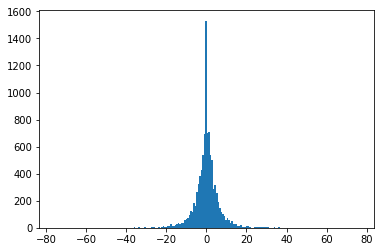

In [88]:
plt.hist(x=diff_gpg['Abs_Diff'], bins=200)
plt.show()

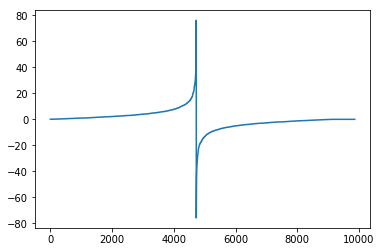

In [89]:
plt.plot(diff_gpg['Abs_Diff'])


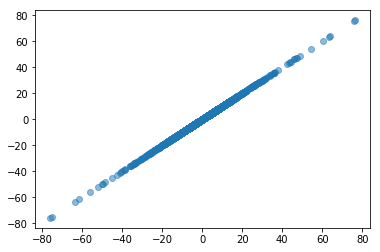

In [90]:
plt.scatter(x=diff_gpg['Abs_Diff'], y=diff_gpg['Abs_Diff'], alpha=0.5)

In [93]:
diff_gpg.head()

,EmployerName,2017Diff,2018Diff,Abs_Diff
0,FORBES SOLICITORS,45.3,45.2,0.1
1,SWANN-MORTON LIMITED,33.3,33.2,0.1
2,BEDALES SCHOOL,37.8,37.7,0.1
3,CENTRAL BEDFORDSHIRE COUNCIL,18.2,18.1,0.1
4,WARDELL ARMSTRONG LLP,20.7,20.6,0.1


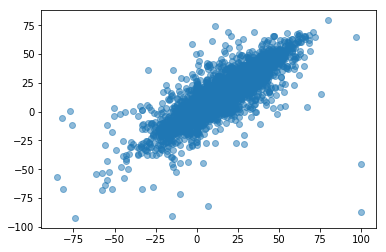

In [92]:
plt.scatter(x=diff_gpg['2017Diff'], y=diff_gpg['2018Diff'], alpha=0.5, )

In [111]:
def color_code (x):
    
    label = ''
    
    if x >= 0:
        label = 'Pos'
    else:
        label = 'Neg'
        
    return label    

In [112]:
diff_gpg['Label'] = diff_gpg['Abs_Diff'].apply(color_code)

diff_gpg.head()

,EmployerName,2017Diff,2018Diff,Abs_Diff,Label
0,FORBES SOLICITORS,45.3,45.2,0.1,Pos
1,SWANN-MORTON LIMITED,33.3,33.2,0.1,Pos
2,BEDALES SCHOOL,37.8,37.7,0.1,Pos
3,CENTRAL BEDFORDSHIRE COUNCIL,18.2,18.1,0.1,Pos
4,WARDELL ARMSTRONG LLP,20.7,20.6,0.1,Pos


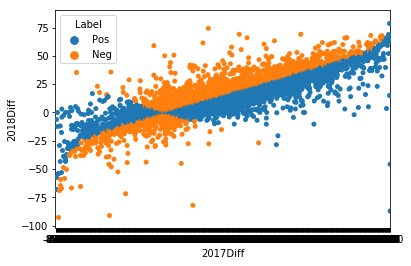

In [116]:
sns.swarmplot(x='2017Diff', y='2018Diff', data=diff_gpg, dodge=False, hue='Label')

In [114]:
diff_gpg.head()

,EmployerName,2017Diff,2018Diff,Abs_Diff,Label
0,FORBES SOLICITORS,45.3,45.2,0.1,Pos
1,SWANN-MORTON LIMITED,33.3,33.2,0.1,Pos
2,BEDALES SCHOOL,37.8,37.7,0.1,Pos
3,CENTRAL BEDFORDSHIRE COUNCIL,18.2,18.1,0.1,Pos
4,WARDELL ARMSTRONG LLP,20.7,20.6,0.1,Pos


In [115]:
aorig.iloc[:5, 10:]

,MaleLowerQuartile,FemaleLowerQuartile,MaleLowerMiddleQuartile,FemaleLowerMiddleQuartile,MaleUpperMiddleQuartile,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile,CompanyLinkToGPGInfo,ResponsiblePerson,EmployerSize,CurrentName,SubmittedAfterTheDeadline,DueDate,DateSubmitted
0,24.4,75.6,50.8,49.2,49.2,50.8,51.5,48.5,https://www.bryanston.co.uk/employment,Nick McRobb (Bursar and Clerk to the Governors),500 to 999,"""Bryanston School"",Incorporated",False,05/04/2018 00:00:00,27/03/2018 11:42:49
1,20.3,79.7,25.4,74.6,10.3,89.7,18.1,81.9,NaN,Philip Galt (Managing Director),250 to 499,"""RED BAND"" CHEMICAL COMPANY, LIMITED",False,05/04/2018 00:00:00,28/03/2018 16:44:25
2,51.0,49.0,53.0,47.0,50.0,50.0,58.0,42.0,NaN,"Emma Crowe (VP, Human Resources)",500 to 999,118 LIMITED,False,05/04/2018 00:00:00,27/03/2018 19:10:41
3,0.0,100.0,2.0,98.0,11.0,89.0,23.0,77.0,NaN,Chloe Lines (Financial Controller),250 to 499,123 EMPLOYEES LTD,True,05/04/2018 00:00:00,04/05/2018 11:24:06
4,56.0,44.0,52.0,48.0,30.0,70.0,24.0,76.0,https://www.1610.org.uk/gender-pay-gap/,Tim Nightingale (CEO),250 to 499,1610 LIMITED,True,05/04/2018 00:00:00,12/04/2018 17:03:26


[]

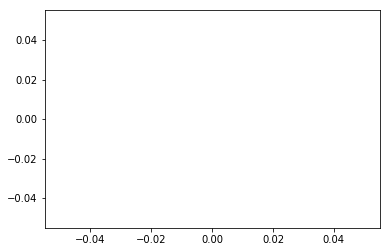

In [121]:
plt.